In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
# !pip install selenium

In [3]:
from selenium import webdriver
import time


menu = dict()
for i in range(1, 8):
    html = requests.get(f'http://dsmhs.djsch.kr/boardCnts/list.do?type=default&page={i}&m=020503&s=dsmhs&boardID=54797')
    soup = BeautifulSoup(html.text, 'html.parser')
    for tr in soup.select_one('div.cntBody table').select('tbody tr'):
        k = ' / '.join([tr.select('td')[-1].text, tr.select_one('td a').text.lstrip()])
        v = tr.select_one('td a')['onclick'].split(':')[-1]
        if '식단표' in k:    # 식단표면 skip
            continue
        menu.update({k: v})

In [4]:
print(*[f'[{i:2>}] {n}' for i, n in enumerate(menu)], sep='\n')
# word = input("\n [!] 어떤 달의 식단을 분석할지 입력하세요 \n(2020년 9월이면 '2020년 9월', 2020년 방학이면 '2020년 여름방학'과 같이 입력) : ")
word = '2020년 9월'
y, m = word.split(' ')
func = None
for i in menu:
    if y[:-1] in i and m in i:
        func = menu[i]
        break

file = ''
if func:
    try:
#         options = webdriver.ChromeOptions()
#         options.add_argument('headless')
#         driver = webdriver.Chrome(r"C:\Users\user\Documents\chromedriver.exe", chrome_options=options)
        driver = webdriver.Chrome(r"chromedriver.exe")
        driver.get('http://dsmhs.djsch.kr/boardCnts/list.do?type=default&page=1&m=020503&s=dsmhs&boardID=54797')
        time.sleep(2)
        driver.execute_script(func)
        time.sleep(3)
        soup = BeautifulSoup(driver.page_source, 'html.parser')
#         print('http://dsmhs.djsch.kr' + soup.select_one('article.board-text div.fieldBox dd a')['href'])
#         print('http://dsmhs.djsch.kr' + soup.select_one('article.board-text div.fieldBox dd a.previewConvert')['href'])
        file = 'http://dsmhs.djsch.kr' + soup.select_one('article.board-text div.fieldBox dd a')['href']
    finally:
        driver.close()

[0] 2020-08-18 / 9월 식재료 원산지 및 영양표시제
[1] 2020-08-14 / 여름방학 식재료 원산지 및 영양표시제
[2] 2020-08-02 / 8월 식재료 원산지 및 영양표시제
[3] 2020-06-24 / 7월 식재료 원산지 및 영양표시제
[4] 2020-05-31 / ​6월 식재료 원산지 및 영양표시제
[5] 2020-05-18 / ​5월 식재료 원산지 및 영양표시제
[6] 2019-11-27 / 12월~1월 식재료 원산지 및 영양표시제
[7] 2019-10-23 / 11월 식재료 원산지 및 영양표시제
[8] 2019-09-26 / 10월 식재료 원산지 및 영양표시제
[9] 2019-08-25 / 9월 식재료 원산지 및 영양표시제
[10] 2019-07-23 / 8월 식재료 원산지 및 영양표시제
[11] 2019-06-27 / 7월 식재료 원산지 및 영양표시제
[12] 2019-05-24 / 6월 식재료 원산지 및 영양표시제
[13] 2019-04-30 / 5월 식재료 원산지 및 영양표시제
[14] 2019-04-30 / 4월 식재료 원산지 및 영양표시제
[15] 2019-02-22 / 3월 식재료원산지 및 영양표시제
[16] 2018-12-23 / 2019년 1 - 2월 학교급식 식재료원산지 및 영양...
[17] 2018-11-24 / 12월 학교급식 식재료 원산지 및 영양표시제
[18] 2018-10-18 / 11월 학교급식 식재료 원산지 및 영양표시제
[19] 2018-09-19 / 10월 학교급식 식재료 원산지 및 영양표시제
[20] 2018-08-26 / 9월 학교급식 식재료 원산지 및 영양표시제
[21] 2018-08-14 / 8월 학교급식 식재료 원산지 및 영양표시제
[22] 2017-08-21 / 8월21일-9월 학교급식식재료 원산지 및 영양표...
[23] 2017-07-04 / 7월 학기중 학교급식식재료 원산지 및 영양표...
[24] 2017-05-26 / 6월 학교급식 식재료 원산지 및 영양표시제(...
[25] 

In [5]:
import pandas as pd

print(file)
xl=pd.ExcelFile(file)
meal_li = []
for meal in ['조식', '중식', '석식']:
    li = []
    for i in range(len(xl.parse(meal))//38):
        # df = pd.DataFrame(xl.parse(meal)[i*38:(i+1)*38+1], columns=[f"r{i}" for i in range(12)])
        df = xl.parse(meal)[i*39:(i+1)*39+1]
        del df['Unnamed: 8']
        li.append(df)
    meal_li.append(li)
# choice = input('[!] 무슨 작업을 하실 것인지 아래의 선택지 중 선택하세요'
#                '\n(특정 날짜 식단 분석 -> 1, 특정 주간 식단 분석 -> 2, 월 전체 식단 분석 -> 3)\n(숫자를 입력하세요) : ')

http://dsmhs.djsch.kr/boardCnts/fileDown.do?m=020503&s=dsmhs&fileSeq=9091907cac8102e71183c1cdbe853b2e


In [14]:
# 전처리
tail = meal_li[0][0].tail(12).head(11)
del tail['Unnamed: 2']
yong = tail.T[1:4]
yong.index = tail.T[1:4][28]
yong.columns = tail['학교급식 식재료 원산지 및 영양표시제']
del yong['영양소']
yong = yong.fillna(0)

day_x = meal_li[0][0][1:2].T[5:12]
yong

학교급식 식재료 원산지 및 영양표시제,에너지(kcal),탄수화물(g),단백질(g),지방(g),비타민A(R.E),티아민(mg),리보플라빈(mg),비타민C(mg),칼슘(mg),철분(mg)
28,,,,,,,,,,
평균\n필요량,900,0.0,20.0,0.0,200.0,0.37,0.5,28.4,267.0,4.0
권장\n섭취량,900,0.0,20.0,0.0,284.0,0.47,0.6,36.7,334.0,5.4
주평균\n섭취량,-22,45.5,18.5,35.9,432.2,0.50,0.8,35.0,254.5,4.8


In [7]:
choice = 2
if choice == 2:
    wek = int(input("원하는 주를 입력하세요 (첫번째 주면 '1'입력) : "))
    ran = int(input('선택지를 선택하세요\n(조식 분석 -> 1, 중식 분석 -> 2, 석식 분석 -> 3)\n(숫자를 입력하세요) : '))
    daily_yong = None
    for i in range(ran-1, ran):
        days = meal_li[i][wek-1].T.tail(7)
        del days[0]
        days.index = days[1]
        del days[1]
        daily_yong = days.T[27:37]
        daily_yong.index = yong.columns
daily_yong

# if choice is 1:
#     day = int(input("원하는 날짜를 입력하세요 (9일이면 '9'입력) : "))
#     ran = int(input("선택지를 선택하세요'
#                     '\n(조식, 중식, 석식 모두 분석 -> 0, 조식 분석 -> 1, 중식 분석 -> 2, 석식 분석 -> 3)\n(숫자를 입력하세요) : "))
#     s, l = ran-1, ran
#     if ran is 0:
#         s, l = 0, 3
#     for i in range(s, l):
#         for j in meal_li[i]
#             print(j.iloc[2])

원하는 주를 입력하세요 (첫번째 주면 '1'입력) : 1
선택지를 선택하세요
(조식 분석 -> 1, 중식 분석 -> 2, 석식 분석 -> 3)
(숫자를 입력하세요) : 1


1,8월 31일(월),9월 1일(화),9월 2일(수),9월 3일(목),9월 4일(금),9월 5일(토),9월 6일(일)
학교급식 식재료 원산지 및 영양표시제,,,,,,,
에너지(kcal),848.4,509.7,742.9,660.7,748.3,747.2,639.7
탄수화물(g),99.6,60.9,91,71.7,90.4,87.4,63.8
단백질(g),28.8,20.5,51.5,23.9,43.5,25.3,20
지방(g),38.8,20.3,29.8,32.8,23.4,35.9,34.3
비타민A(R.E),236.9,27.1,770.2,578,548.7,945.9,521.9
티아민(mg),0.5,0.3,0.4,0.9,0.6,2,1.1
리보플라빈(mg),0.3,0.2,0.9,1.9,0.6,2.3,1.2
비타민C(mg),52.1,0.6,39.7,70.5,12,105.3,58.8
칼슘(mg),68.6,111.3,280.8,414.5,397.2,387.3,248


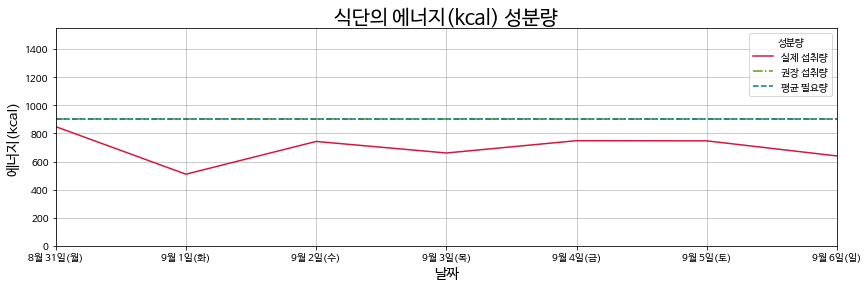

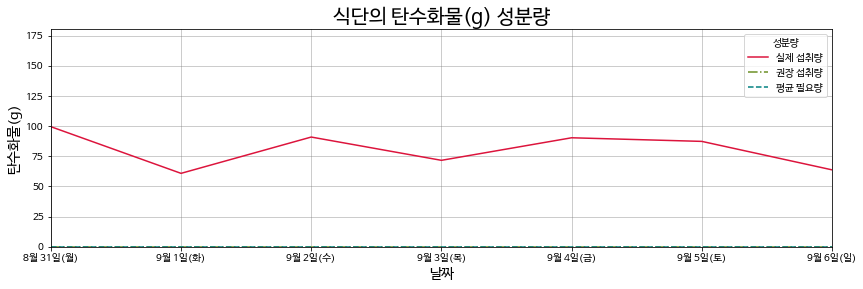

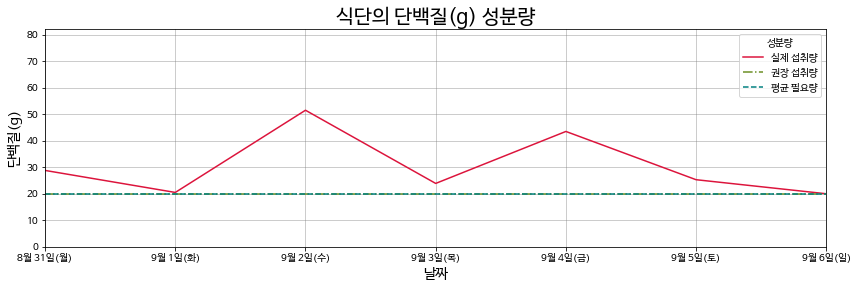

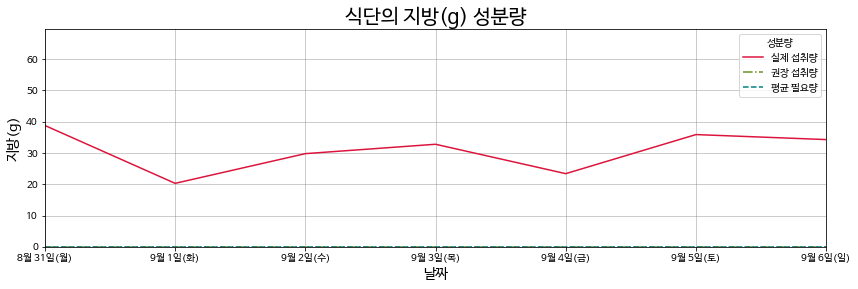

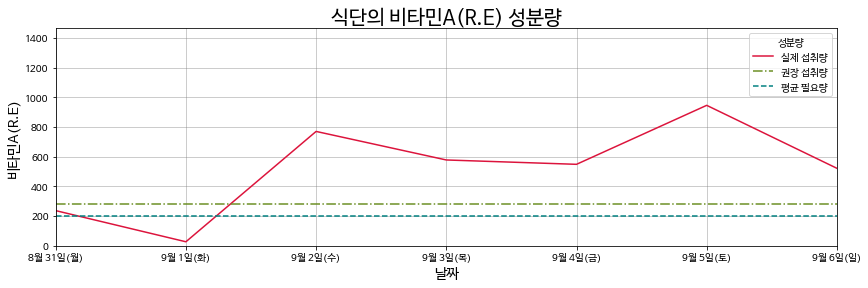

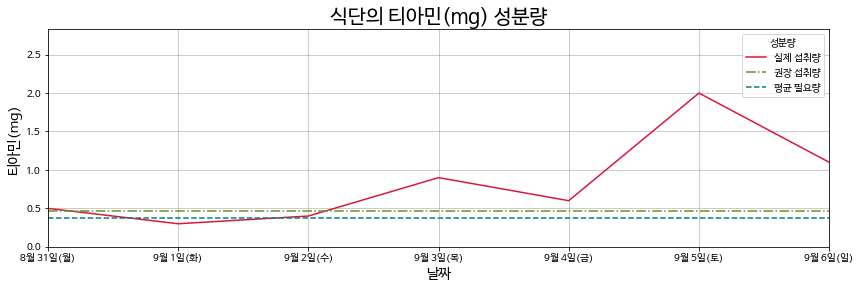

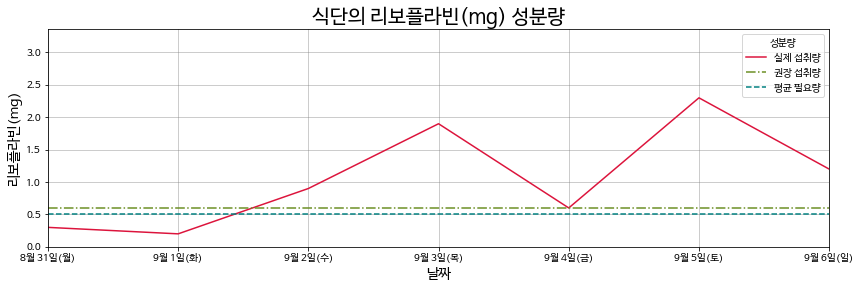

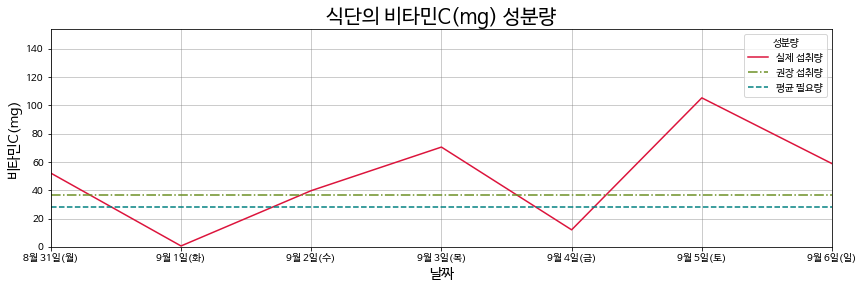

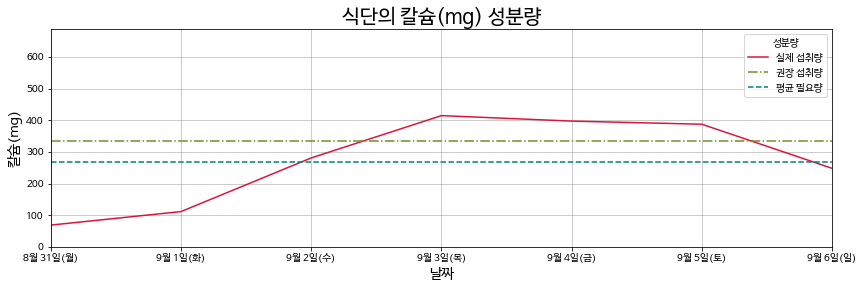

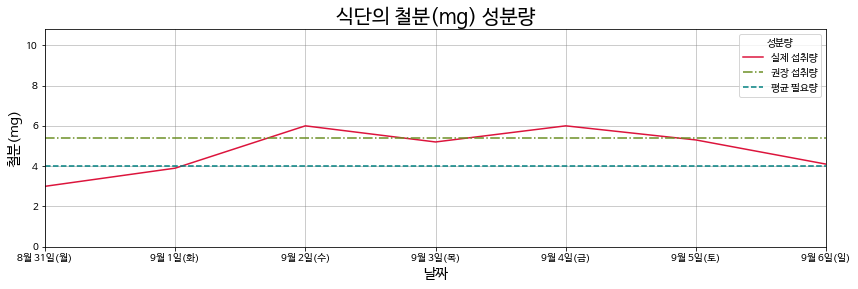

In [66]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rcParams["figure.figsize"] = (14,4)
for i in range(10):
    plt.axis([0, 6, 0, daily_yong.iloc[i].mean() + daily_yong.iloc[i].max()])
    plt.plot(daily_yong.columns, daily_yong.iloc[i], '-', c='crimson', label='실제 섭취량')
    plt.plot(daily_yong.columns, [yong.iloc[1][daily_yong.index[i]]] * 7, '-.', c='olivedrab', label='권장 섭취량')
    plt.plot(daily_yong.columns, [yong.iloc[0][daily_yong.index[i]]] * 7, '--', c='teal', label='평균 필요량')
    plt.grid(True, color='gray', alpha=0.5)
    plt.legend(loc="best", title='성분량')
    plt.xlabel('날짜',fontsize=14)
    plt.ylabel(daily_yong.index[i],fontsize=14)
    plt.title(f'식단의 {daily_yong.index[i]} 성분량',fontsize='20')
    plt.savefig(f'{word} {wek} {daily_yong.index[i]}.png')
    plt.show()